In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x=[2,3,5,7]
y=[5,7,4,3]


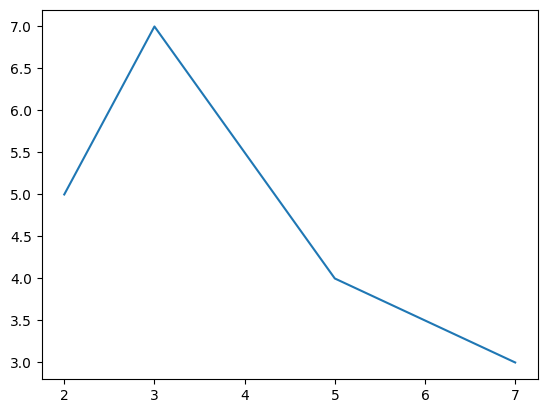

In [3]:
sns.lineplot(x=x,y=y)
plt.show()

In [4]:
df = pd.read_csv("road_traffic_accidents.csv")
df.head(10)

,Date,Number_Of_Killed,Number_Of_Injured,Location,Vehicle_Type
0,2024-01-01,0,7,Rangpur,Motorcycle
1,2024-01-02,3,9,Rajshahi,Bus
2,2024-01-03,4,4,Barishal,Motorcycle
3,2024-01-04,3,6,Rangpur,Car
4,2024-01-05,0,9,Khulna,Car
5,2024-01-06,3,1,Mymensingh,Bicycle
6,2024-01-07,2,7,Barishal,Truck
7,2024-01-08,3,1,Barishal,Truck
8,2024-01-09,1,3,Rangpur,Motorcycle
9,2024-01-10,1,0,Chattogram,Bus


In [5]:
df.isnull().sum()

Date                 0
Number_Of_Killed     0
Number_Of_Injured    0
Location             0
Vehicle_Type         0
dtype: int64

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

# finding the accident per month
deaths_per_month = df.groupby(df["Date"].dt.month)["Number_Of_Killed"].sum()

deaths_per_month.index = ["January", "February", "March", "April", "May", "June",
                          "July", "August", "September", "October", "November", "December"]


print(deaths_per_month)

January      127
February     114
March        124
April        124
May          121
June         118
July          71
August        72
September     67
October       64
November      53
December      65
Name: Number_Of_Killed, dtype: int64


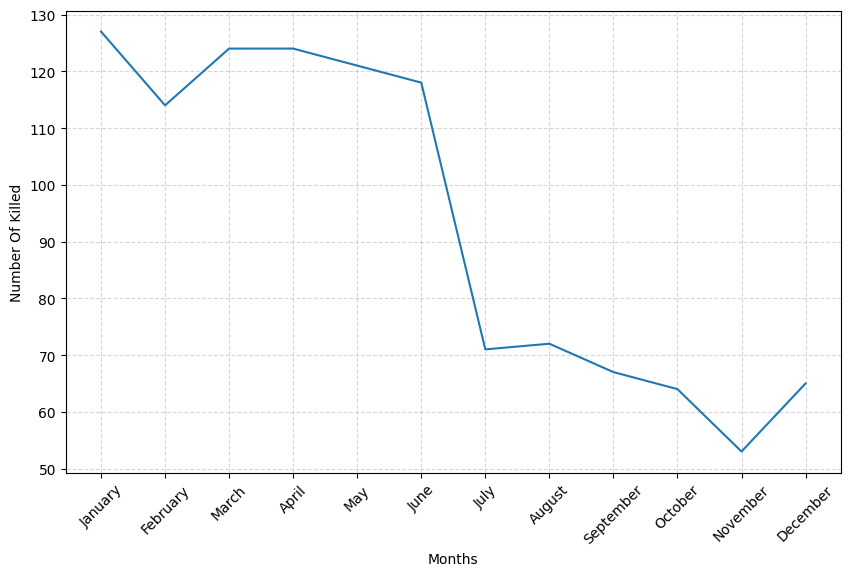

In [7]:

plt.figure(figsize=(10,6))

sns.lineplot(x=deaths_per_month.index, y= deaths_per_month)

plt.grid(linestyle="--", alpha=0.5)
plt.ylabel("Number Of Killed")
plt.xlabel("Months")
plt.xticks(rotation=45)
plt.show()

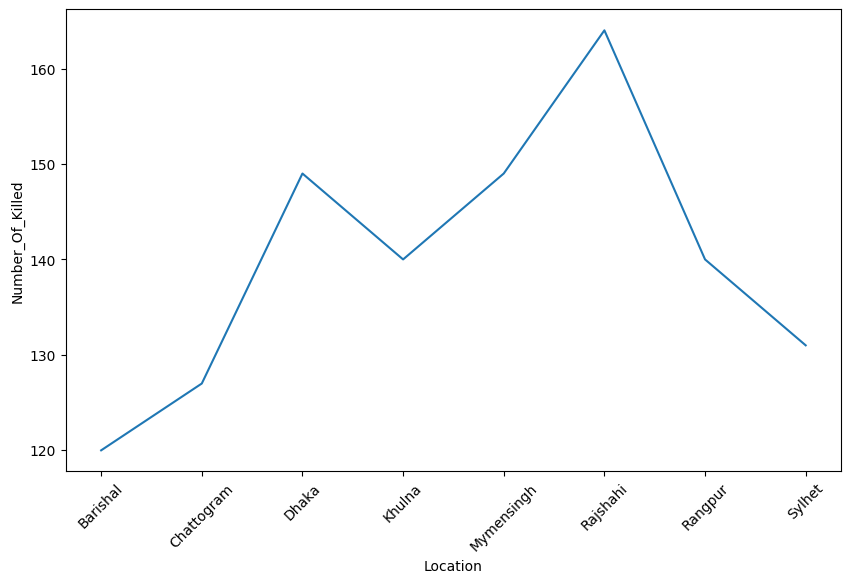

In [8]:
#graph using data frame


plt.figure(figsize=(10,6))
deaths_per_location = df.groupby("Location")["Number_Of_Killed"].sum()


sns.lineplot(data = deaths_per_location)
plt.xticks(rotation=45)
plt.show()

In [9]:

#load built-in data from seaborn. builtin data like "tips", "penguins", "flights", etc.
penguins_data = sns.load_dataset("penguins")
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


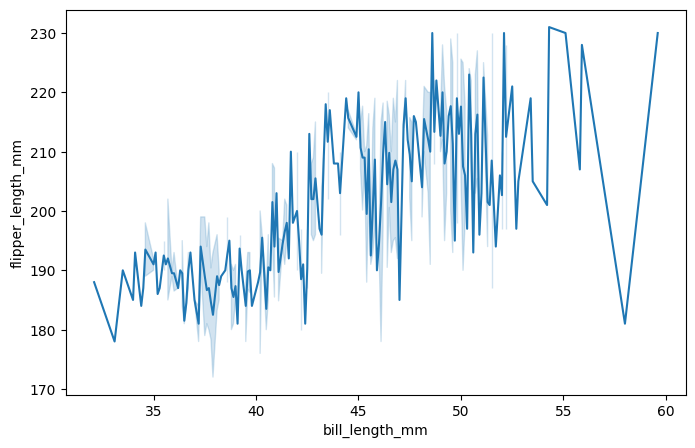

In [10]:
plt.figure(figsize=(8,5))

sns.lineplot(x= "bill_length_mm",y="flipper_length_mm", data=penguins_data)

plt.show()

In [11]:
pd.isnull(penguins_data).sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [12]:
penguins_data= penguins_data.dropna()

In [13]:
pd.isnull(penguins_data).sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

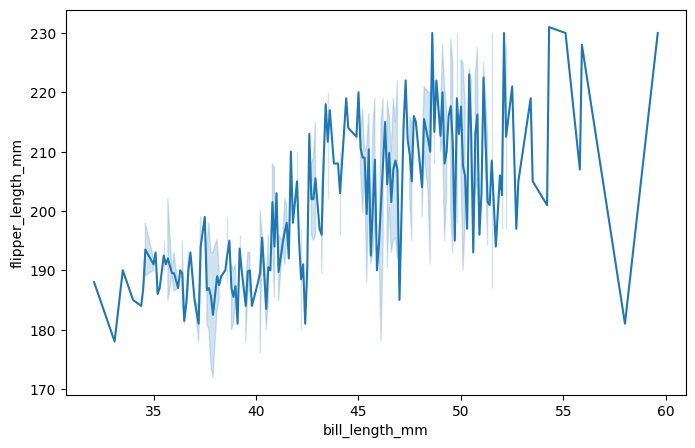

In [14]:
plt.figure(figsize=(8,5))

sns.lineplot(x= "bill_length_mm",y="flipper_length_mm", data=penguins_data)

plt.show()

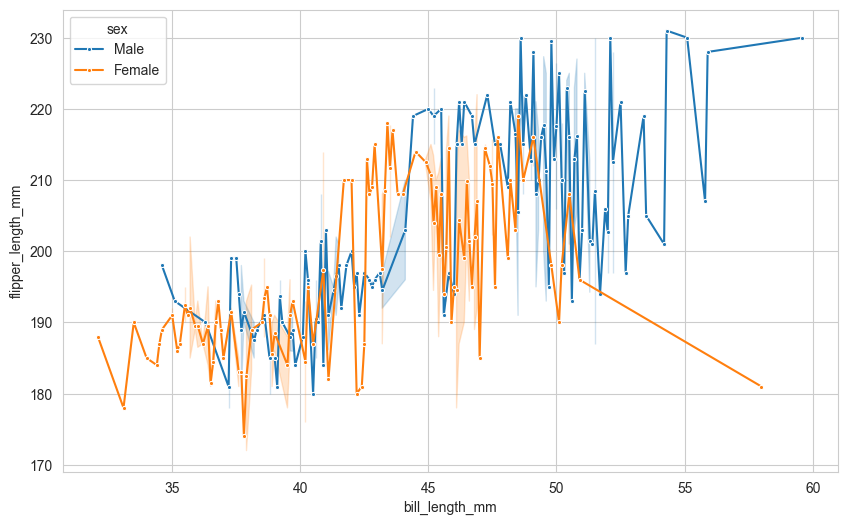

In [20]:
# use of hue

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x="bill_length_mm",y="flipper_length_mm",data=penguins_data, hue="sex",marker=".")
plt.show()

Missing values before cleaning:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Missing values after cleaning:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


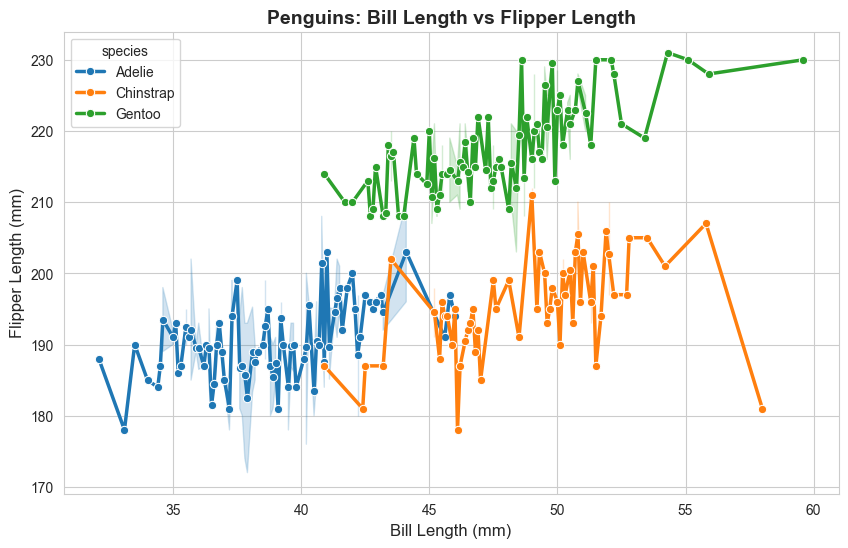

In [18]:

def load_and_clean_data(dataset_name):
    """
    Load a dataset from seaborn and clean missing values.
    :param dataset_name: str, name of the seaborn dataset to load.
    :return: Cleaned pandas DataFrame.
    """
    # Load dataset
    data = sns.load_dataset(dataset_name)

    # Check for missing values
    print("Missing values before cleaning:\n", data.isnull().sum())

    # Drop missing values
    data_cleaned = data.dropna()

    print("\nMissing values after cleaning:\n", data_cleaned.isnull().sum())

    return data_cleaned

def plot_line_chart(data, x_col, y_col, hue_col=None, title="Line Plot", xlabel=None, ylabel=None):
    """
    Create a Seaborn line plot with professional styling.
    :param data: DataFrame, cleaned dataset.
    :param x_col: str, column for x-axis.
    :param y_col: str, column for y-axis.
    :param hue_col: str, column for color differentiation (optional).
    :param title: str, title of the plot.
    :param xlabel: str, x-axis label.
    :param ylabel: str, y-axis label.
    """
    # Set Seaborn style
    sns.set_style("whitegrid")

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot line plot
    sns.lineplot(
        x=x_col,
        y=y_col,
        data=data,
        hue=hue_col,
        marker="o",
        linewidth=2.5
    )

    # Set titles and labels
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel if xlabel else x_col, fontsize=12)
    plt.ylabel(ylabel if ylabel else y_col, fontsize=12)

    # Display legend if hue is used
    if hue_col:
        plt.legend(title=hue_col)

    # Show plot
    plt.show()

if __name__ == "__main__":
    # Load dataset and clean it
    dataset_name = "penguins"  # Change to any seaborn built-in dataset
    penguins_data = load_and_clean_data(dataset_name)

    # Plot the line chart
    plot_line_chart(
        data=penguins_data,
        x_col="bill_length_mm",
        y_col="flipper_length_mm",
        hue_col="species",
        title="Penguins: Bill Length vs Flipper Length",
        xlabel="Bill Length (mm)",
        ylabel="Flipper Length (mm)"
    )
